# ***Decision Tree***
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
socialdata = pd.read_csv('Social_Network_Ads.csv')
socialdata.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
socialdata['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
socialdata.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
socialdata.drop(columns=['User ID','Gender'], inplace=True)

In [6]:
socialdata.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [7]:
x = socialdata.iloc[:,:-1]
y = socialdata['Purchased']

In [8]:
# using the standard scaler to It ensures that all features contribute equally to the model
# avoiding dominance by features with larger values or different units


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100

83.75

In [15]:
dt.predict([[35,20000]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

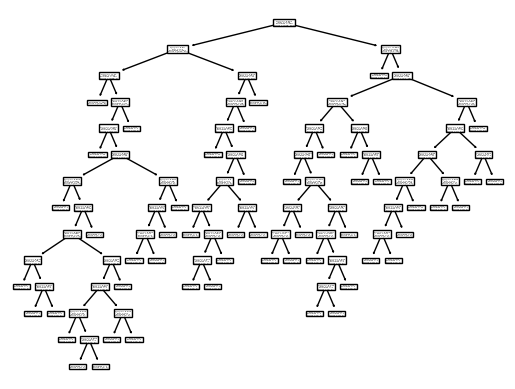

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

In [ ]:
# Checking the classifier for the entropy

dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x,y)
dt1.score(x_test,y_test)*100

100.0

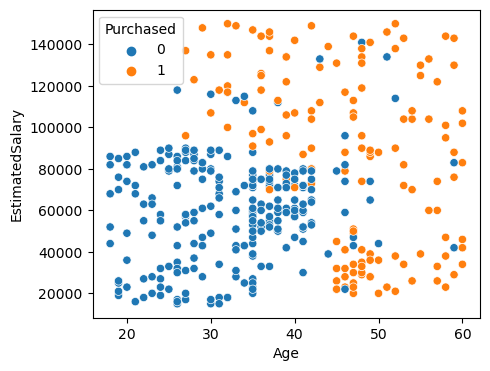

In [24]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Age', y='EstimatedSalary', data=socialdata,hue='Purchased')
plt.show()

In [16]:
# mlextends to plot the region where the decison or the partision is made

from mlxtend.plotting import plot_decision_regions

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


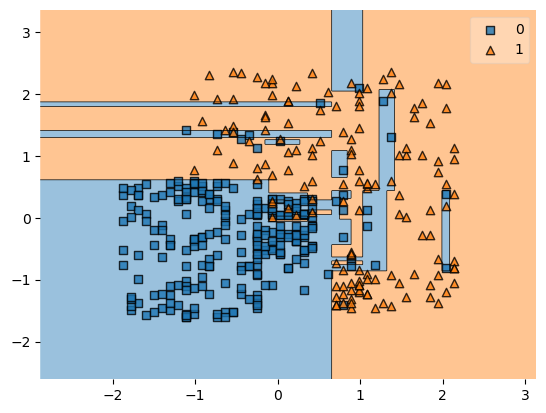

In [23]:
# plt.figure(figsize=(5,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


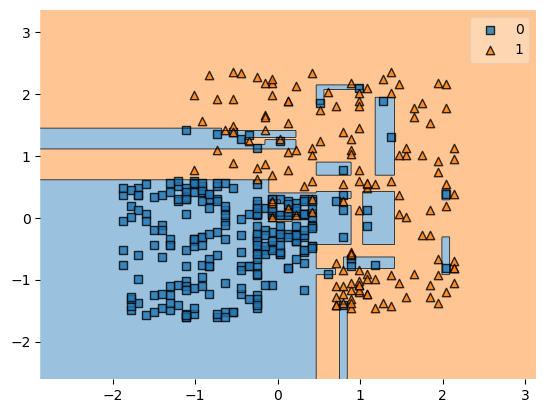

In [22]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

#### ***Pre and Post Pruning***
---

In [27]:
print(dt.score(x_test,y_test)*100)
print(dt.score(x_train,y_train)*100)

83.75
99.6875


In [45]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
print(dt.score(x_test,y_test)*100)
print(dt.score(x_train,y_train)*100)

90.0
93.4375


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


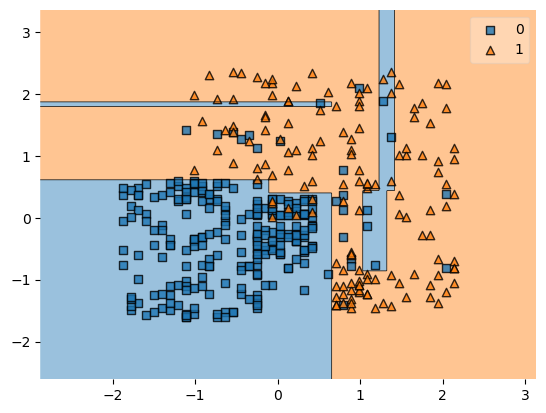

In [47]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

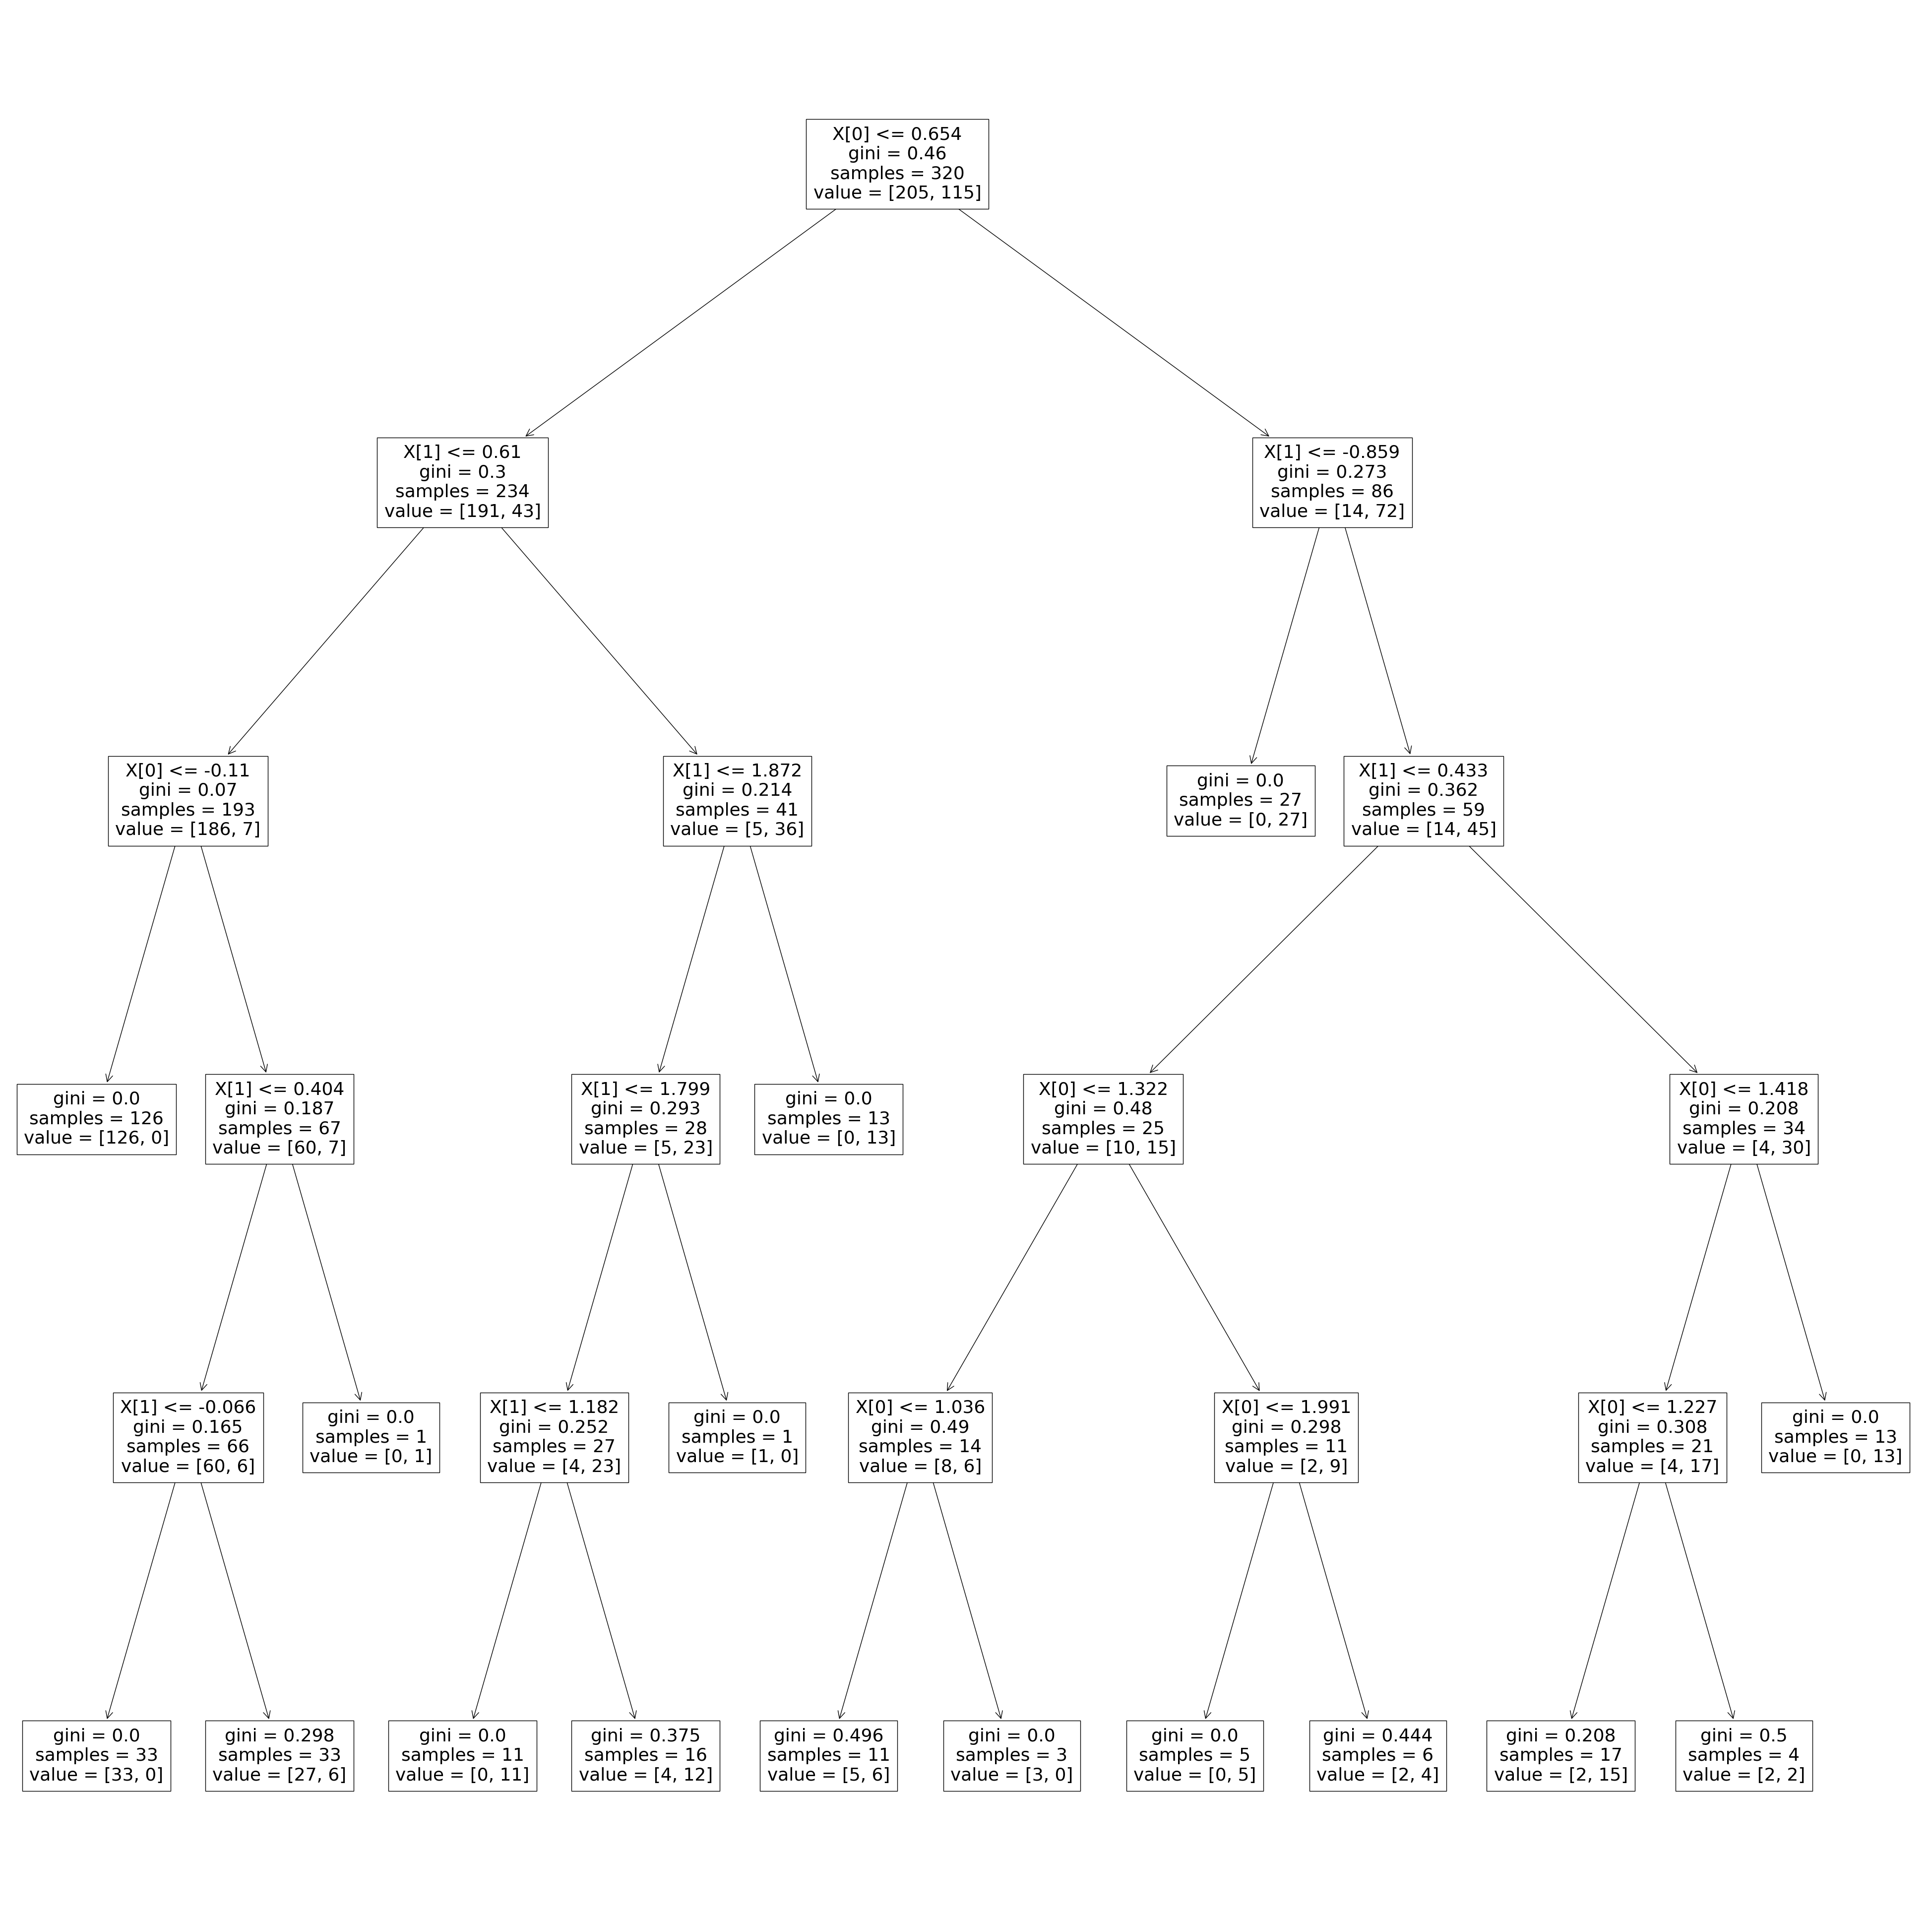

In [48]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

In [49]:
# Using the Post Pruning

for i in range(1,20):
    dt3 = DecisionTreeClassifier(max_depth=i)
    dt3.fit(x_train,y_train)
    print(i," - ",dt3.score(x_train,y_train)*100," - " ,dt3.score(x_test,y_test)*100)

1  -  82.1875  -  90.0
2  -  91.875  -  91.25
3  -  91.875  -  91.25
4  -  93.125  -  91.25
5  -  93.4375  -  90.0
6  -  95.0  -  86.25
7  -  96.875  -  85.0
8  -  97.5  -  85.0
9  -  98.125  -  85.0
10  -  98.4375  -  85.0
11  -  99.0625  -  83.75
12  -  99.0625  -  83.75
13  -  99.6875  -  83.75
14  -  99.6875  -  83.75
15  -  99.6875  -  83.75
16  -  99.6875  -  83.75
17  -  99.6875  -  83.75
18  -  99.6875  -  83.75
19  -  99.6875  -  83.75
